# The purpose of this application is to produce Ternary scatter graphs regarding rock and mineral geochemical data. 

**Copy data from Google Drive to Colaboratory**

https://www.mikulskibartosz.name/how-to-load-data-from-google-drive-to-pandas-running-in-google-colaboratory/

In [1]:
#@title LIBRARIES N MOUNT DRIVE { form-width: "100px" }
### LIBRARIES ###

import pandas as pd
import numpy as np
from google.colab import drive
import os
from google.colab import files
drive.mount('/content/drive') # connects to your own Drive, regardless if collab if from someone else

Mounted at /content/drive


To access someone's else file, ask to a share license, 
and create a shortcut from 'shared with me' to MyDrive.
This way you can access your directories like this: 'drive/MyDrive/Paste'

In [2]:
#@title import_data() { form-width: "100px" }
def import_data():
  '''returns a dataFrame, store in a variable'''
  path = 'drive/MyDrive/' + input('drive/MyDrive/...')
  print('\nFILES:')
  display(os.listdir(f'{path}'))
  print()
  fileName = input('file name: ') 
  xls = pd.ExcelFile(f'{path}/{fileName}') # stores excel file
  print('\nSHEETS: ')
  display(xls.sheet_names) # list sheets
  print()
  sheet = input('load sheet: ') # select sheet
  database = pd.read_excel(f'{path}/{fileName}', sheet_name = sheet) # get data
  print()
  print(f'Data sample:\n{database.head()}') # display sample of data
  print('\nImport successful!')
  return database # to store in a var

In [3]:
#@title ternary_coord()
# SETTING VARIABLES FOR TERNARY
def ternary_coord(data_tab):
  print(data_tab[0:0])
  global xaxis, yaxis, zaxis
  xaxis = input('x axis: ')
  yaxis = input('y axis: ')
  zaxis = input('z axis: ')

  x = list(data_tab[xaxis])
  y = list(data_tab[yaxis])
  z = list(data_tab[zaxis])

  for header, i in enumerate([x,y,z]):
    print(i[:5])
  return x, y, z

In [4]:
#@title unique() { form-width: "100px" }
def unique(dbcolumn):
  '''# CHECK UNIQUE VALUES OF A COLUMN #'''
  print(set(dbcolumn))

In [5]:
#@title ternary_plot() { form-width: "100px"}
def ternary_plot(x, y, z, color = None, 
                 non_num = None, discrete_colors = {}, 
                 barvar = None, cmapcolor = None, 
                 label = False, grid = False, 
                 fields = None, frame = (10,10)):
  ''' 
  ternary plot, first of all, normalizes the 3D coordinates, and 
  re-normalizes x,y coordinates between themselves
  so, it passes the normalized data as (X,Y) coordinates to be plotted 
  within a triangle
  
  color:  a unique color for every data

  non_num:  a non-numeric variable that can be classified by a discrete list 
            of colors

  discrete_colors:  a dictionary that carries each unique value of 
                    non_num *arg with its respective color
  
  barvar: the column(var) that goes on the continuous colorbar
            e.g., a fourth element

  cmapcolor:  cmap pattern ('viridis', 'plasma', 'inferno', 'magma', 'cividis', 
              'jet', 'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
              'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
              'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper')

  label:  which column data to be plotted as a label por point

  grid: default = False

  fields: 'chromite' for chromite classification ternary (Cr, Al, Fe)
          'asbolane' for asbolane-lithiphorite ternary (Al, Ni, Co)
  '''
  ### DEFINING NORMALIZATION FUNC ###
  def normalization(x,y,z):
      sum_norm = []
      x_norm = []
      y_norm = []
      z_norm = []

      for i in range(0, len(x)):
        sum_norm.append(x[i] + y[i] + z[i])

      for i in range(0, len(x)):
        x_norm.append(x[i]/sum_norm[i])
        y_norm.append(y[i]/sum_norm[i])
        z_norm.append(z[i]/sum_norm[i])
      return x_norm, y_norm, z_norm

      #print(x[0], y[0],  z[0], sum_norm[0])

  import matplotlib.pyplot as plt
  import matplotlib.lines as lines
  
  ### NORMALIZATION OF 3D COORDINATES ###
  x_norm, y_norm, z_norm = normalization(x,y,z)
  
  ### 3D to 2D coordinates ###
  X = []
  Y = []
  X.clear()
  Y.clear()
  for i in range(0,len(z_norm)):
    Y.append(z_norm[i])

  for i in range(0, len(x_norm)):
    X.append(((y_norm[i]/(x_norm[i] + y_norm[i])) * (1-Y[i])) + 0.5*Y[i])
      # normalizing x n y again for the X axis, multiply for the complement of 
      # Y axis to adjust to triangle, so add a displacement proportional to Y

  ### setting some ternary ploting configs like ternaty height h 
  h = (((3**(1/2)))/(2))+0.012

  print(h)

  ### PLOT SIZE ###
  if cmapcolor != None:
    fig = plt.figure(figsize =(frame[0]+2,frame[1]*h))
    fig, ax = plt.subplots(1, figsize =(frame[0]+2,frame[1]*h))
  else:
    fig = plt.figure(figsize =(frame[0],frame[1]*h))
    fig, ax = plt.subplots(1, figsize =(frame[0],frame[1]*h))
  
  ### TERNARY BOARDER ###
  triangle = ((0.0, 0.5, 1, 0), (0.001, 1, 0.001, 0.001))
  ax.plot(triangle[0],triangle[1], '-', color = 'black', linewidth = '1.2')

  ### TERNARY GRID ###
  if grid == True:
    grid = {'hgrid' : ((0.05, 0.95, 0.9, 0.1, 0.15, 0.85, 0.8, 0.2, 0.25, 0.75, 0.7, 0.3, 0.35, 0.65, 0.6, 0.4, 0.45, 0.55),
                    (0.1, 0.1, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.5, 0.5, 0.6, 0.6, 0.7, 0.7, 0.8, 0.8, 0.9, 0.9)),
            'xgrid' : ((0.05, 0.1, 0.2, 0.1, 0.15, 0.3, 0.4, 0.2, 0.25, 0.5, 0.6, 0.3, 0.35, 0.7, 0.8, 0.4, 0.45, 0.9, 1),
                    (0.1, 0, 0, 0.2, 0.3, 0, 0, 0.4, 0.5, 0, 0, 0.6, 0.7, 0, 0, 0.8, 0.9, 0, 0)),
            'ygrid' : ((0.1, 0.55, 0.6, 0.2, 0.3, 0.65, 0.7, 0.4, 0.5, 0.75, 0.8, 0.6, 0.7, 0.85, 0.9, 0.8, 0.9, 0.95),
                    (0, 0.9, 0.8, 0, 0, 0.7, 0.6, 0, 0, 0.5, 0.4, 0, 0, 0.3, 0.2, 0, 0, 0.1))}
    for i in grid.keys():
      ax.plot(grid[i][0], grid[i][1], '-',color = 'black', linewidth = '0.2', alpha = 0.5)

  ### CHROMITE FIELDS ###

  if fields == 'chromite':
    hfields = ((0.125, 0.875, 0.75, 0.25, 0.375, 0.625),
              (0.25, 0.25, 0.5, 0.5, 0.75, 0.75))
    ax.plot(hfields[0], hfields[1], '--',color = 'black', alpha = 0.7, linewidth = '1')

    vfields = ((0.25, 0.375, 0.625, 0.75, 0.5, 0.5),
              (0, 0.25, 0.25, 0, 0, 0.75))
    ax.plot(vfields[0], vfields[1], '--',color = 'black', alpha = 0.7, linewidth = '1')
    
    field_label = (('Magnetite', 'Cr-magnetite', 'Al-magnetite', 'Ferrian chromite', 'Ferrian pickotite', 'Pickotite', 'Hercynite', 'Chromite', 'Al-chromite'),
                   (0.5, 0.4, 0.6, 0.37, 0.63, 0.6, 0.82, 0.18, 0.4),
                   (0.85, 0.6, 0.6, 0.4, 0.4, 0.1, 0.1, 0.1, 0.1,))

    for i, l in enumerate(field_label[0]):
        ax.annotate(l, xy=(field_label[1][i], field_label[2][i]), xytext=(field_label[1][i], field_label[2][i]),
                  arrowprops=None, ha='center', va='center', rotation= 0, size=12)
        
  ### ASBOLANE-LITHIOPHORITE FIELDS ###

  if fields == 'asbolane':
    asbolane = ((0.45, 0.9, 1, 0.75, 0.675), (0.9, 0, 0,0.5, 0.45))
    ax.plot(asbolane[0], asbolane[1], '-',color = 'black', linewidth = '1')

    ax.annotate('Lithiophorite', xy=(0.08, 0.05), xytext=(0.3, 0.2),
                arrowprops=dict(arrowstyle='->'), ha='center', va='center', rotation= 0, size=15)
    ax.annotate('Co-rich', xy=(0.6, 0.7), xytext=(0.6, 0.7),
                arrowprops=None, ha='center', va='center', rotation= -60, size=15)
    ax.annotate('Ni-rich', xy=(0.83, 0.24), xytext=(0.83, 0.24),
                arrowprops=None, ha='center', va='center', rotation= -60, size=15)
    ax.annotate('Asbolane', xy=(0.925, 0.24), xytext=(0.78, 0.53),
                arrowprops=None, ha='center', va='center', rotation= -60, size=15)
    
  ### MG SILICATES FIELDS ###

  if fields == 'mgsilicates':
    mgsilicates = ((0.875, 0.215, 0.305, 0.81, 0.8, 0.315), (0.25, 0.43, 0.61, 0.38, 0.4, 0.635))
    ax.plot(mgsilicates[0], mgsilicates[1], '--',color = 'black', linewidth = '1')

    ax.annotate('serpentine series', xy=(0.08, 0.05), xytext=(0.23, 0.425),
                arrowprops=None, ha='left', va='center', rotation= -13, size=8)
    ax.annotate('talc series', xy=(0.08, 0.05), xytext=(0.31, 0.575),
                arrowprops=None, ha='left', va='center', rotation= -21, size=8)
    ax.annotate('sepiolite series', xy=(0.08, 0.05), xytext=(0.33, 0.62),
                arrowprops=None, ha='left', va='center', rotation= -22, size=8)


  # points label #
  if bool(label) == True:
    annotations = label
    for i, label in enumerate(annotations):
        plt.annotate(label, (0.02 + X[i], 0.02 + Y[i]), fontsize = 14, weight = 'normal')

  ### CONFIG ###
  plt.ylim(0, 1)
  plt.xlim(0, 1)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.axis('off')  # command for hiding the axis.


  ### ANNOTATE ###
  # https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html
  # annotate axis labels #
  axis_label = ((xaxis, yaxis, zaxis),
                (0, 1, 0.5),
                (-0.04, -0.04, 1.035))

  for i, l in enumerate(axis_label[0]):
    ax.annotate(l, xy=(axis_label[1][i], axis_label[2][i]), xytext=(axis_label[1][i], axis_label[2][i]),
              arrowprops=None, ha='center', va='center', rotation= 0, size=20, annotation_clip = False)

  ### PLOT ###
  if color != None:
    plt.scatter(X, Y, s = 120, alpha = 1, c = color, edgecolors = 'black')

  elif type(non_num) != type(None):
    plt.scatter(X, Y, s = 120, alpha = 1, c = non_num.map(discrete_colors), edgecolors = 'black')
    plt.legend(non_num.map(discrete_colors), discrete_colors.keys(), loc ="upper left")
    ax.annotate(discrete_colors, xy=(0.2, 0.9), xytext=(0.2, 0.9),
                arrowprops=None, ha='center', va='center', rotation= 0, size=12)

  elif cmapcolor != None:
    plt.scatter(X, Y, s = 120, alpha = 1, c = list(barvar), cmap = cmapcolor , edgecolors = 'black') # 'inferno' 'jet'
    cb = plt.colorbar()
    cb.set_label(barvar.name, color= 'black', fontsize = 18)

  else: plt.scatter(X, Y, s = 120, alpha = 1, c = 'black', edgecolors = 'black')

  ### SAVE FIG ###
  save_fig = input('save? (y/n)')
  if save_fig == 'y':
    fname = input('file name: ')
    plt.savefig(f'{fname}.png', transparent=False)
    files.download(f'{fname}.png')
  else: pass

  plt.show()


In [ ]:
chromite = import_data()

In [ ]:
Cr, Al, Fe = ternary_coord(chromite)

In [ ]:
unique(chromite['source'])

{'JC', 'BS-2', 'BC-2'}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: UserWarning: Legend does not support 'red' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


0.8780254037844386
save? (y/n)y
file name: chr_bygroup


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 576x505.743 with 0 Axes>

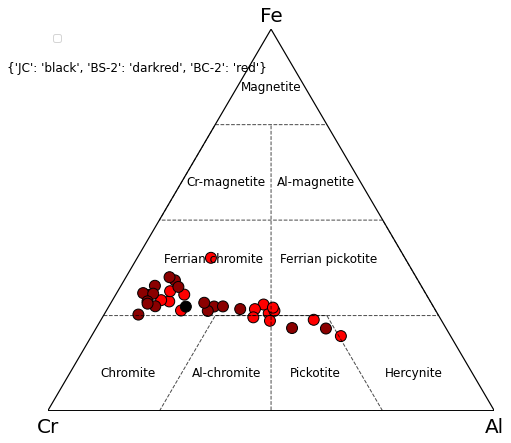

In [ ]:
#@title 123 { form-width: "100px" }
legenda = {'JC':'black', 'BS-2':'darkred', 'BC-2':'red'}

ternary_plot(Cr, Al, Fe, 
             non_num = chromite['source'], 
             discrete_colors = legenda, 
             label=False, 
             grid=False, 
             fields='chromite', 
             frame=(8,8))

0.8780254037844386
save? (y/n)n


<Figure size 720x505.743 with 0 Axes>

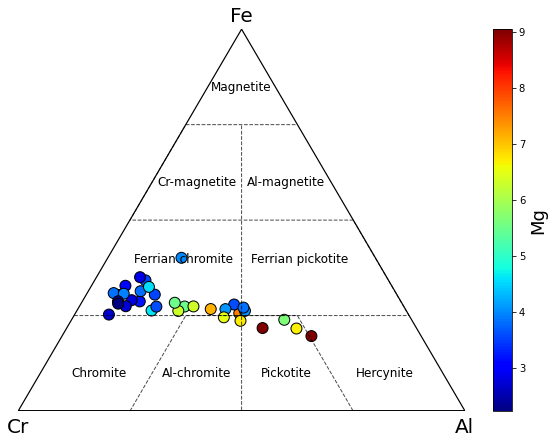

In [ ]:
ternary_plot(Cr, Al, Fe, 
             barvar=chromite['Mg'], 
             cmapcolor='jet', 
             fields = 'chromite',
             frame= (8,8))

In [ ]:
asbolane = import_data()
unique(asbolane['source'])

drive/MyDrive/...Colab Notebooks/Colab Notebooks - Matheus

FILES:


['allmineral_compilation_OXIDE.xls',
 'database_sf_2022_05_py.xlsx',
 'geoprospec.ipynb',
 'tiff_processing.ipynb',
 'ternary_plot.ipynb',
 'mnoxides_py.xlsx',
 'chromite_manhaes2021.xlsx',
 'chromite_BAJF_classif.png',
 'Analises_MEV-EDS_Vivian.xlsx',
 'ternary_mineral_classif_1.0.ipynb']


file name: Analises_MEV-EDS_Vivian.xlsx

SHEETS: 


['CHROMITE', 'ASBOLANE-LITHIOPHORITE']


load sheet: ASBOLANE-LITHIOPHORITE

Data sample:
  source         size                 mineral  id        Si        Al  \
0   BC-2  0.25x0.18mm  Asbolane-lithiophorite  10  0.810671  6.844873   
1   BC-2  0.25x0.18mm  Asbolane-lithiophorite  11  0.851004  6.345130   
2   BC-2  0.25x0.18mm                asbolane  16  0.735492  2.154758   
3   BC-2  0.25x0.18mm                asbolane  17  0.842905  2.113092   
4   BC-2  0.25x0.18mm                asbolane  18  1.409797  2.550828   

         Ca   Ti        Cr         Mn        Fe        Co         Ni   Cu  \
0  0.224166  0.0  0.567581  27.441844  5.928850  9.834964  11.849223  0.0   
1  0.083514  0.0  0.427818  20.355941  5.360418  6.778834   7.631529  0.0   
2  0.158018  0.0  0.000000  24.203991  6.674223  4.259671  14.562529  0.0   
3  0.140960  0.0  0.000000  24.604785  6.303917  4.285914  15.405966  0.0   
4  0.000000  0.0  0.000000  22.828527  6.540929  4.427444  13.996719  0.0   

    Zn   Ba        Sum  
0  0.0  0.0  64.202281 

Empty DataFrame
Columns: [source, size, mineral, id, Si, Al, Ca, Ti, Cr, Mn, Fe, Co, Ni, Cu, Zn, Ba, Sum]
Index: []
x axis: Al
y axis: Ni
z axis: Co


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: UserWarning: Legend does not support 'red' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


[6.844872688, 6.345130266, 2.154758307, 2.113091648, 2.550828236]
[11.84922267, 7.631529425, 14.56252886, 15.40596618, 13.99671933]
[9.834964069, 6.778834113, 4.259670915, 4.285913512, 4.427444176]
0.8780254037844386
save? (y/n)n


<Figure size 576x505.743 with 0 Axes>

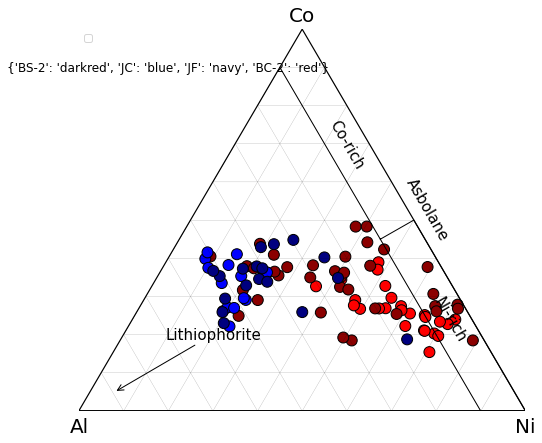

In [ ]:
leg_asb = {'BS-2': 'darkred', 'JC': 'blue', 'JF':'navy', 'BC-2':'red'}
ternary_coord(asbolane)
ternary_plot(asbolane['Al'], asbolane['Ni'], asbolane['Co'], 
             color=None, 
             non_num = asbolane['source'], 
             discrete_colors=leg_asb, 
             barvar=None, 
             cmapcolor=None, 
             label=False, 
             grid=True, 
             fields='asbolane',
             frame = (8,8))